In [12]:
import pandas as pd
inputFile = './chapter5/demo/data/consumption_data.xls'  # 销量及其他属性数据
outputFile = './data_type.xls'
data = pd.read_excel(inputFile,index_col='Id')
data.head()

,R,F,M
Id,,,
1,27,6,232.61
2,3,5,1507.11
3,4,16,817.62
4,3,11,232.81
5,14,7,1913.05


In [13]:
k = 3  # 聚类类别数
iteration = 500  # 聚类最大循环次数
data_zs = 1.0 * (data - data.mean()) / data.std()  # 数据标准化（标准差标准化）
data_zs.head()

,R,F,M
Id,,,
1,0.764186,-0.493579,-1.158711
2,-1.024757,-0.630079,0.622527
3,-0.950217,0.871423,-0.341103
4,-1.024757,0.188922,-1.158432
5,-0.204824,-0.357079,1.189868


In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, n_jobs=2, max_iter=iteration)  # 建立模型，分为 k 类， 并发数 2， 最大循环 500 次。
model.fit(data_zs)  # 训练模型

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=2, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# 简单打印结果
r1 = pd.Series(model.labels_).value_counts()  # 统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_)  # 找出聚类中心
r = pd.concat([r2, r1], axis='columns')  # 横向连接，得到聚类中心对应的类别下的数目
r.columns = list(data.columns) + ['类别数目']  # 重命名表头
r

,R,F,M,类别数目
0,-0.160451,1.114802,0.392844,341
1,-0.149353,-0.658893,-0.271780,559
2,3.455055,-0.295654,0.449123,40


In [16]:
# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis='columns')
r.columns = list(data.columns) + ['类别标签']
r.head()

,R,F,M,类别标签
Id,,,,
1,27,6,232.61,1
2,3,5,1507.11,1
3,4,16,817.62,0
4,3,11,232.81,1
5,14,7,1913.05,1


In [ ]:
r.to_excel(outputFile)  # 保存结果

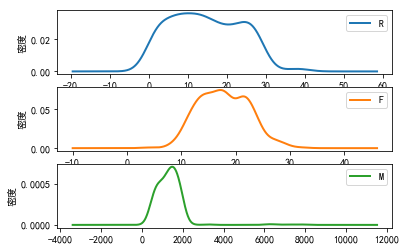

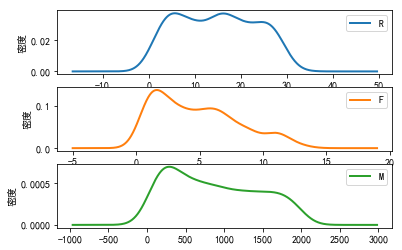

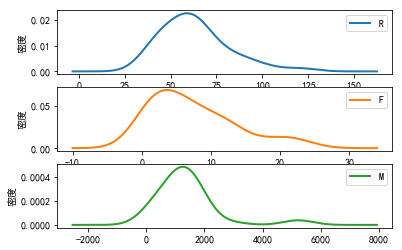

In [24]:
def density_plot(data):
    '''
    自定义绘图函数
    '''
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
    p = data.plot(kind='kde', linewidth=2, subplots=True, sharex=False)
    [p[i].set_ylabel('密度') for i in range(k)]
    plt.legend()
    return plt

pic_output = './pd_'  # 概率密度图文件名前缀
for i in range(k):
    density_plot(data[r[u'类别标签']==i]).savefig(u'%s%s.png' %(pic_output, i))

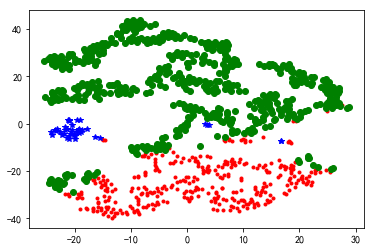

In [25]:
# 用 TSNE 进行数据降维并展示聚类结果
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit_transform(data_zs)  # 数据降维
tsne = pd.DataFrame(tsne.embedding_, index=data_zs.index)  # 转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 不同类别用不同颜色和样式绘图
d = tsne[r['类别标签'] == 0]
plt.plot(d[0], d[1], 'r.')
d = tsne[r['类别标签'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r['类别标签'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.show()